In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt3

In [2]:
trial_data_all, subjects, cue_level_names, image_type_names = analyze_expt3.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition, dprime_by_condition, propleft_by_condition, rt_by_condition = analyze_expt3.get_perf_by_cond()

acc_by_run, dprime_by_run, rt_by_run = analyze_expt3.get_perf_by_run()

acc_by_supcat, dprime_by_supcat, rt_by_supcat = analyze_expt3.get_perf_by_supercateg()

In [3]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt3.get_categ_info()

In [4]:
subjects

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [5]:
super_confus_total = np.full(fill_value=0.0, shape=(n_image_types, n_super, n_super))
super_confus_correct = np.full(fill_value=0.0, shape=(n_image_types, n_super, n_super))
super_confus_noresp = np.full(fill_value=0.0, shape=(n_image_types, n_super, n_super))

cue_level = 'super'; # super only

for ii in range(n_image_types):
    
    for super_ind_actual in range(n_super):
        
        for super_ind_distract in range(n_super):
            
            if super_ind_actual==super_ind_distract:
                
                super_confus_total[ii, super_ind_actual, super_ind_distract] = np.nan
                super_confus_correct[ii, super_ind_actual, super_ind_distract] = np.nan
                super_confus_noresp[ii, super_ind_actual, super_ind_distract] = np.nan
            
            else:
                inds = np.array((trial_data_all['cue_level']==cue_level) & \
                           (trial_data_all['image_type']==image_type_names[ii]) & \
                           (trial_data_all['super_name']==super_names[super_ind_actual]) & \
                           (trial_data_all['distractor_name']==super_names[super_ind_distract]))

                tot = np.sum(inds)
                correct = np.sum(np.array(trial_data_all['correct'])[inds])
                noresp = np.sum(np.isnan(np.array(trial_data_all['rt'])[inds]))

                super_confus_total[ii, super_ind_actual, super_ind_distract] += tot
                super_confus_correct[ii, super_ind_actual, super_ind_distract] += correct
                super_confus_noresp[ii, super_ind_actual, super_ind_distract] += noresp

In [8]:
super_confus_total.shape

(5, 8, 8)

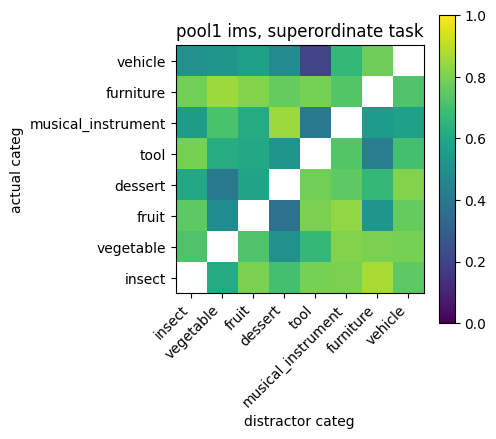

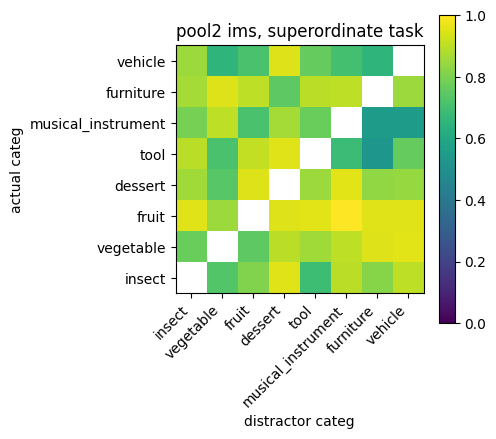

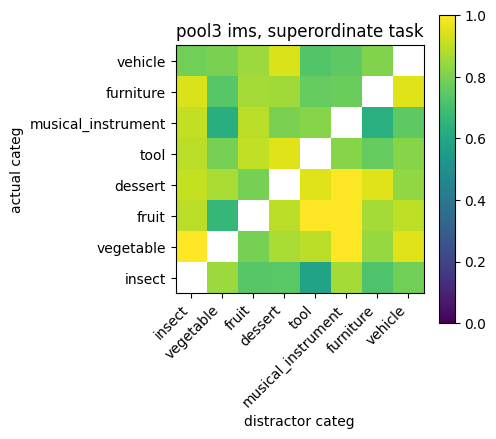

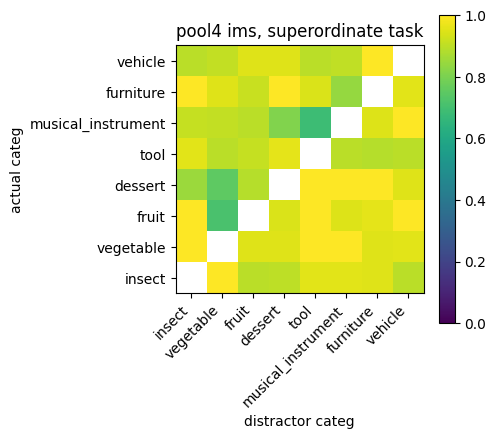

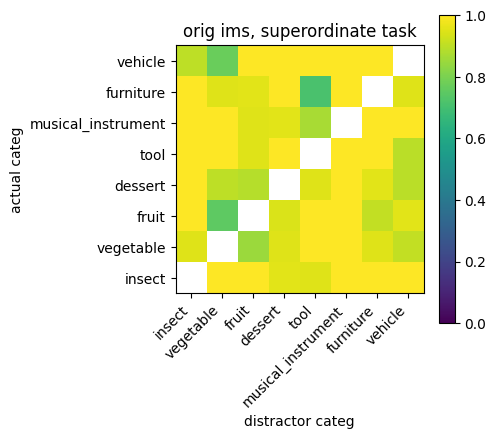

In [6]:
prop_correct = super_confus_correct / super_confus_total

# plt.figure(figsize=(12,8))

for ii in range(n_image_types):
    
    plt.figure(figsize=(4,4))
    # plt.subplot(2,3,ii+1)
    plt.pcolormesh(prop_correct[ii,:,:], vmin=0, vmax=1.0)
    plt.axis('square')
    plt.title('%s ims, superordinate task'%image_type_names[ii])
    plt.xticks(np.arange(n_super)+0.5, super_names, rotation=45, ha = 'right')
    plt.yticks(np.arange(n_super)+0.5, super_names)
   
    plt.xlabel('distractor categ')
    plt.ylabel('actual categ')
    
    plt.colorbar()

In [9]:
basic_confus_total = np.full(fill_value=0.0, shape=(n_image_types, n_super, n_basic_each_super, n_basic_each_super))
basic_confus_correct = np.full(fill_value=0.0, shape=(n_image_types, n_super, n_basic_each_super, n_basic_each_super))
basic_confus_noresp = np.full(fill_value=0.0, shape=(n_image_types, n_super, n_basic_each_super, n_basic_each_super))

cue_level = 'basic'; # basic only

bnames_each = [np.array(basic_names)[super_names_long==super_names[si]] \
              for si in range(n_super)]

for ii in range(n_image_types):
    
    for super_ind_actual in range(n_super):
        
        bnames_here = bnames_each[super_ind_actual]
        
        for bi1, bname1 in enumerate(bnames_here):

            for bi2, bname2 in enumerate(bnames_here):

                if bi1==bi2:

                    basic_confus_total[ii, super_ind_actual, bi1, bi2] = np.nan
                    basic_confus_correct[ii, super_ind_actual, bi1, bi2] = np.nan
                    basic_confus_noresp[ii, super_ind_actual, bi1, bi2] = np.nan

                else:
                    inds = np.array((trial_data_all['cue_level']==cue_level) & \
                               (trial_data_all['image_type']==image_type_names[ii]) & \
                               (trial_data_all['super_name']==super_names[super_ind_actual]) & \
                               (trial_data_all['basic_name']==bname1) & \
                               (trial_data_all['distractor_name']==bname2))

                    tot = np.sum(inds)
                    correct = np.sum(np.array(trial_data_all['correct'])[inds])
                    noresp = np.sum(np.isnan(np.array(trial_data_all['rt'])[inds]))

                    basic_confus_total[ii, super_ind_actual, bi1, bi2] += tot
                    basic_confus_correct[ii, super_ind_actual, bi1, bi2] += correct
                    basic_confus_noresp[ii, super_ind_actual, bi1, bi2] += noresp

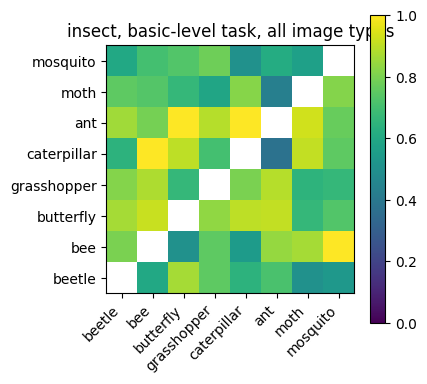

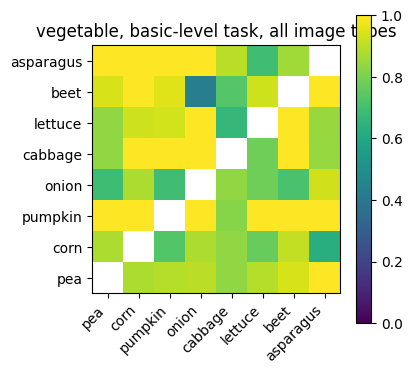

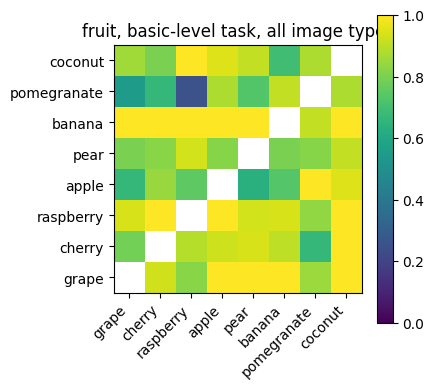

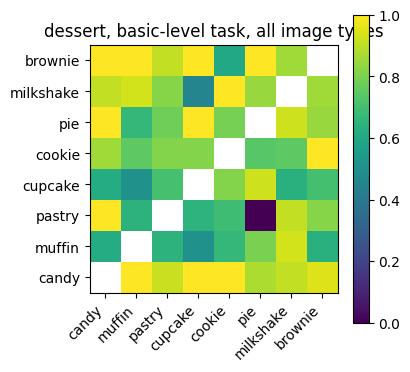

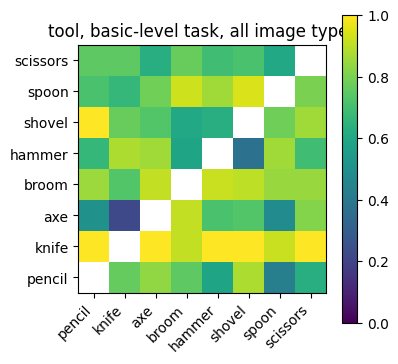

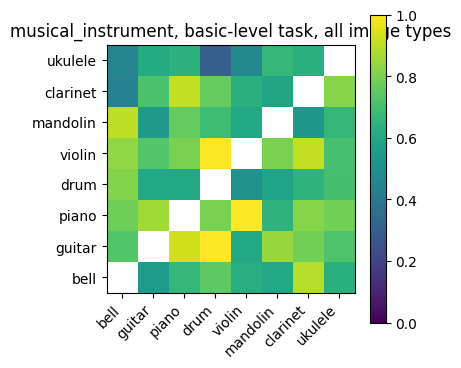

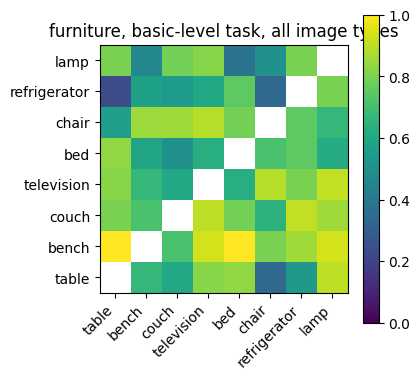

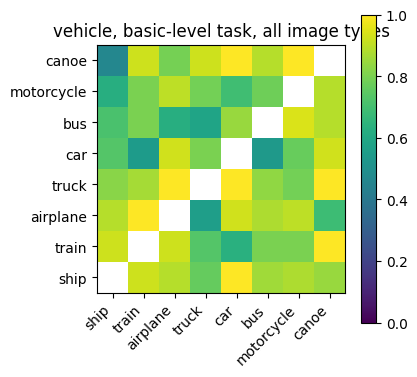

In [10]:
btot = np.sum(basic_confus_total, axis=0)
bcor = np.sum(basic_confus_correct, axis=0)

prop_correct = bcor/btot

# plt.figure(figsize=(12,8))

for super_ind in range(n_super):
    
    plt.figure(figsize=(4,4))
    # plt.subplot(2,3,ii+1)
    plt.pcolormesh(prop_correct[super_ind,:,:], vmin=0, vmax=1.0)
    plt.axis('square')
    plt.title('%s, basic-level task, all image types'%super_names[super_ind])
    
    plt.xticks(np.arange(n_basic_each_super)+0.5, bnames_each[super_ind], rotation=45, ha = 'right')
    plt.yticks(np.arange(n_basic_each_super)+0.5, bnames_each[super_ind])
    
    plt.colorbar()